In [1]:
# Global imports and settings
%matplotlib inline
from preamble import *
plt.rcParams['figure.dpi'] = 100 # Use 300 for PDF, 100 for slides
HTML('''<style>html, body{overflow-y: visible !important} .CodeMirror{min-width:105% !important;} .rise-enabled .CodeMirror, .rise-enabled .output_subarea{font-size:140%; line-height:1.2; overflow: visible;} .output_subarea pre{width:110%}</style>''') # For slides

# Part 2: Fundamental Algorithms
**And how to use them**

Joaquin Vanschoren, Eindhoven University of Technology

# Linear models
Linear models make a prediction using a linear function of the input features. 
* Can be very powerful for or datasets with many features. 
* If you have more features than training data points, any target y can be perfectly modeled (on the training set) as a linear function.
* Even non-linear data (or non-linearly seperable data) can be modelled with linear models with a bit of preprocessing.
    * Basis for 'Generalized Linear Models' (e.g. kernelized SVMs, see lecture 2)

## Linear models for regression
Prediction formula for input features x. $w_i$ and b are the _model parameters_ that need to be learned.  

$$\hat{y} = \mathbf{w}\mathbf{x} + b = \sum_{i=0}^{p} w_i \cdot x_i + b = w_0 \cdot x_0 + w_1 \cdot x_1 + ... + w_p \cdot x_p + b $$

There are many different algorithms, differing in how w and b are learned from the training data.

w[0]: 0.393906  b: -0.031804


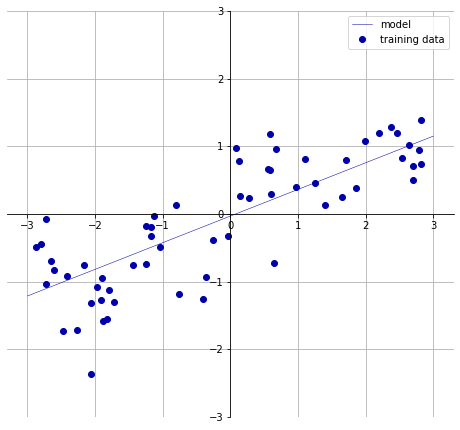

In [9]:
mglearn.plots.plot_linear_regression_wave()

### Linear Regression aka Ordinary Least Squares
* Finds the parameters w and b that minimize the _mean squared error_ between predictions (red) and the true regression targets (blue), y, on the training set. 
    * MSE: Sum of the squared differences (residuals) between the predictions $\hat{y_i}$ and the true values $y_i$.
$$\mathcal{L}_{MSE} = \sum_{n=0}^{N} (y_n-\hat{y_n})^2 = \sum_{n=0}^{N} (y_n-(\mathbf{w}\mathbf{x_n} + b))^2$$ 

<img src="../images/02_least_squares.png" alt="ml" style="width: 550px;"/>

#### Solving ordinary least squares
* Convex optimization problem with unique closed-form solution (if you have more data points than model parameters w)
* It has no hyperparameters, thus model complexity cannot be controlled.
* It **very easily overfits**. What does that look like?
    * model parameters *w* become very large (steep incline/decline)
    * a small change in the input *x* results in a very different output *y* 

Linear regression can be found in `sklearn.linear_model`. We'll evaluate it on the Boston Housing dataset.

``` python
lr = LinearRegression().fit(X_train, y_train)
```

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [11]:
print("Weights (coefficients): {}".format(lr.coef_[0:40]))
print("Bias (intercept): {}".format(lr.intercept_))

Weights (coefficients): [ -412.711   -52.243  -131.899   -12.004   -15.511    28.716    54.704
   -49.535    26.582    37.062   -11.828   -18.058   -19.525    12.203
  2980.781  1500.843   114.187   -16.97     40.961   -24.264    57.616
  1278.121 -2239.869   222.825    -2.182    42.996   -13.398   -19.389
    -2.575   -81.013     9.66      4.914    -0.812    -7.647    33.784
   -11.446    68.508   -17.375    42.813     1.14 ]
Bias (intercept): 30.934563673645666


In [12]:
print("Training set score (R^2): {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score (R^2): {:.2f}".format(lr.score(X_test, y_test)))

Training set score (R^2): 0.95
Test set score (R^2): 0.61


### Ridge regression
* Same formula as linear regression
* Adds a penalty term to the least squares sum:

$$\mathcal{L}_{Ridge} = \sum_{n=0}^{N} (y_n-(\mathbf{w}\mathbf{x_n} + b))^2 + \alpha \sum_{i=0}^{p} w_i^2$$ 

* Requires that the coefficients (w) are close to zero.
    * Each feature should have as little effect on the outcome as possible 
* Regularization: explicitly restrict a model to avoid overfitting. 
* Type of L2 regularization: prefers many small weights
    * L1 regularization prefers sparsity: many weights to be 0, others large

`Ridge` can also be found in `sklearn.linear_model`.  
`ridge = Ridge().fit(X_train, y_train)`

In [13]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


Test set score is higher and training set score lower: less overfitting!

The strength of the regularization can be controlled with the `alpha` parameter. Default is 1.0.
* Increasing alpha forces coefficients to move more toward zero (more regularization)
* Decreasing alpha allows the coefficients to be less restricted (less regularization)

We can plot the weight values for differents levels of regularization. Move the slider to increase/decrease regularization. Increasing regularization decreases the values of the coefficients, but never to 0.

In [14]:
from __future__ import print_function
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from sklearn.linear_model import Ridge

X, y = mglearn.datasets.load_extended_boston()
X_B_train, X_B_test, y_B_train, y_B_test = train_test_split(X, y, random_state=0)

@interact
def plot_ridge(alpha=(0,10.0,0.05)):
    r = Ridge(alpha=alpha).fit(X_B_train, y_B_train)
    fig, ax = plt.subplots(figsize=(8,2))
    ax.plot(r.coef_, 'o')
    ax.set_title("alpha {}, score {:.2f} (training score {:.2f})".format(alpha, r.score(X_B_test, y_B_test), r.score(X_B_train, y_B_train)))
    ax.set_xlabel("Coefficient index")
    ax.set_ylabel("Coefficient magnitude")
    ax.hlines(0, 0, len(r.coef_))
    ax.set_ylim(-25, 25)
    ax.set_xlim(0, 50);

interactive(children=(FloatSlider(value=5.0, description='alpha', max=10.0, step=0.05), Output()), _dom_classe…

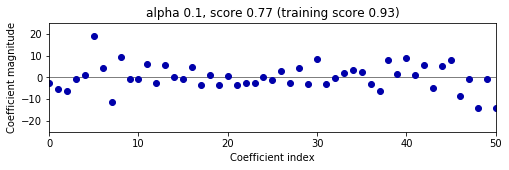

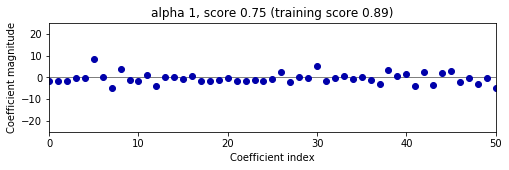

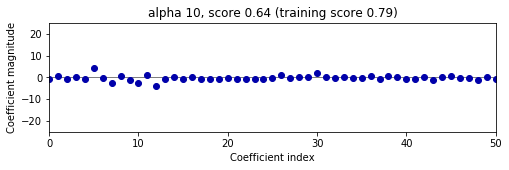

In [15]:
for alpha in [0.1, 1, 10]:
    plot_ridge(alpha)

#### Other ways to reduce overfitting:
* Add more training data: with enough training data, regularization becomes less important
    * Ridge and linear regression will have the same performance
* Use less features, remove unimportant ones or find a lower-dimensional embedding (e.g. PCA)
    * Less degrees of freedom
* Scaling the data may also help

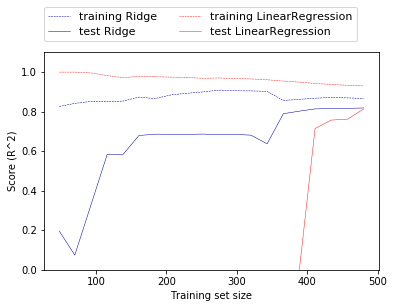

In [16]:
mglearn.plots.plot_ridge_n_samples()

### Lasso (Least Absolute Shrinkage and Selection Operator)
* Another form of regularization
* Adds a penalty term to the least squares sum:
$$\mathcal{L}_{Lasso} = \sum_{n=0}^{N} (y_n-(\mathbf{w}\mathbf{x_n} + b))^2 + \alpha \sum_{i=0}^{p} |w_i|$$ 
* Prefers coefficients to be exactly zero (L1 regularization).
* Some features are entirely ignored by the model: automatic feature selection.
* Same parameter `alpha` to control the strength of regularization. 
* Convex, but no longer strictly convex (and NOT differentiable). Weights can be optimized using (for instance) _coordinate descent_
* New parameter `max_iter`: the maximum number of coordinate descent iterations
    * Should be higher for small values of `alpha`

We can again analyse what happens to the weights. Increasing regularization under L1 leads to many coefficients becoming exactly 0.

In [17]:
from sklearn.linear_model import Lasso

@interact
def plot_lasso(alpha=(0,0.5,0.005)):
    r = Lasso(alpha=alpha).fit(X_B_train, y_B_train)
    fig, ax = plt.subplots(figsize=(8,2))
    ax.plot(r.coef_, 'o')
    ax.set_title("alpha {}, score {:.2f} (training score {:.2f})".format(alpha, r.score(X_B_test, y_B_test), r.score(X_B_train, y_B_train)))
    ax.set_xlabel("Coefficient index")
    ax.set_ylabel("Coefficient magnitude")
    ax.hlines(0, 0, len(r.coef_))
    ax.set_ylim(-25, 25);
    ax.set_xlim(0, 50);

interactive(children=(FloatSlider(value=0.25, description='alpha', max=0.5, step=0.005), Output()), _dom_class…

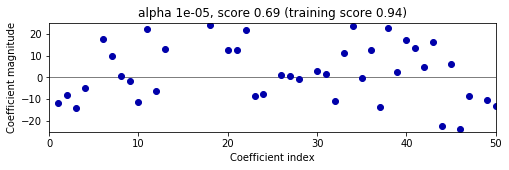

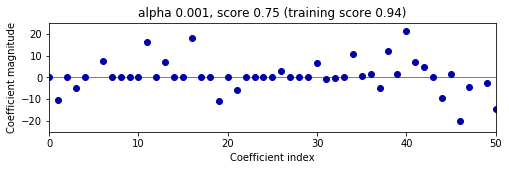

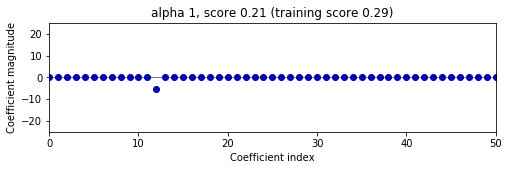

In [18]:
for alpha in [0.00001, 0.001, 1]:
    plot_lasso(alpha)

## Linear models for Classification
Aims to find a (hyper)plane that separates the examples of each class.  
For binary classification (2 classes), we aim to fit the following function: 

$\hat{y} = w_0 * x_0 + w_1 * x_1 + ... + w_p * x_p + b > 0$  
    
When $\hat{y}<0$, predict class -1, otherwise predict class +1

There are many algorithms for learning linear classification models, differing in:

* Loss function: evaluate how well the linear model fits the training data
* Regularization techniques

Most common techniques:

* Logistic regression: 
    * `sklearn.linear_model.LogisticRegression`
* Linear Support Vector Machine: 
    * `sklearn.svm.LinearSVC`


### Logistic regression
* Transforms the classification problem into a regression problem
* Maps positive examples to value 1, others to value 0
* Fits a _logistic_ (or _sigmoid_) function to predict whether a given sample belongs to class 1.
    * $y$ value can be seen as a probability that the example is positive
$$ z = f(x) = w_0 * x_0 + w_1 * x_1 + ... + w_p * x_p $$
$$ \hat{y} = Pr[1|x_1,...,x_k] = g(z) = \frac{1}{1+e^{-z}} $$
![LogisticRegression image](../images/01_logistic.png)

[Source](https://florianhartl.com/logistic-regression-geometric-intuition.html)

On 2-dimensional data: 
![LogisticRegression image](../images/02_logistic2d.png)

* The logistic function is chosen because it maps values (-Inf,Inf) to a probability [0,1]
* We add a new dimension for the dependent variable $\text{y}$ and fit the logistic function g(z) so that it separates the samples as good as possible. The positive (blue) points are mapped to 1 and the negative (red) points to 0.
* After fitting, the logistic function provides the probability that a new point is positive. If we need a binary prediction, we can threshold at 0.5.
* There are different ways to find the optimal parameters w that fit the training data best

##### Loss function: cross-entropy
* Since logistic regression returns a probability, we want to use that in the loss function rather than choosing an an arbitrary threshold (e.g. positive in y > 0.5).  
* We can measure the difference between the actual probabilities $p_i$ and the predicted probabilities $q_i$ is the cross-entropy $H(p,q)$:
$$ H(p,q) = - \sum_{i} p_i log(q_i) $$
* Note: This is also called _maximum likelihood_ estimation because instead of minimizing cross-entropy $H(p,q)$, you can maximize _log-likelihood_ $-H(p,q)$
* In binary classification, $i=0,1$ and $p_1=y$, $p_0=1-y$, $q_1=\hat{y}$, $q_0=1-\hat{y}$
* This yields _binary cross-entropy_:
$$ H(p,q) = - y log(\hat{y}) - (1-y) log(1-\hat{y})$$

##### Cross-entropy loss
* Loss function: the average of all cross-entropies in the sample (of $N$ data points):
$$\mathcal{L_{log}}(\mathbf{w}) = \sum_{n=1}^{N} H(p_n,q_n) = \sum_{n=1}^{N} \big[ - y_n log(\hat{y_n}) - (1-y_n) log(1-\hat{y_n}) \big]$$
with $$\hat{y_n} = \frac{1}{1+e^{-\mathbf{w} \cdot \mathbf{x}}}$$
* This is called _logistic loss_, _log loss_ or _cross-entropy loss_
* We can (and should always) add a regularization term, either L1 or L2, e.g. for L2:
$$\mathcal{L_{log}}'(\mathbf{w}) = \mathcal{L_{log}}(\mathbf{w}) + \alpha \sum_{i} w_i^2 $$
    - Note: sklearn uses $C$ instead of $\alpha$, and it is the inverse (smaller values, more regularization)

Cross-entropy loss

<img src="../images/09_cross-entropy.png" alt="ml" style="width: 600px;"/>

##### Optimization methods (solvers)
* There are different ways to optimize cross-entropy loss.
* Gradient descent
    - The logistic function is differentiable, so we can use (stochastic) gradient descent
    - Stochastic Average Gradient descent (SAG): only updates gradient in one direction at each step
* Coordinate descent (default, called `liblinear` in sklearn)
    - Faster, may converge more slowly, may more easily get stuck in local minima
* Newton-Rhapson (or Newton Conjugate Gradient):
    - Finds optima by computing second derivatives (more expensive)
    - Works well if solution space is (near) convex
    - Also known as _iterative re-weighted least squares_
* Quasi-Newton methods
    - Approximate, faster to compute
    - E.g. Limited-memory Broyden–Fletcher–Goldfarb–Shanno (`lbfgs`)

#### Model selection: Logistic regression  
`logreg = LogisticRegression(C=1).fit(X_train, y_train)`

Adjust the slider to see the effect of C and L1/L2 regularization

In [50]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_C_train, X_C_test, y_C_train, y_C_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

@interact
def plot_logreg(C=(0.01,100.0,0.1), penalty=['l1','l2']):
    r = LogisticRegression(C=C, penalty=penalty, solver='liblinear').fit(X_C_train, y_C_train)
    fig, ax = plt.subplots(figsize=(8,2))
    ax.plot(r.coef_.T, 'o')
    ax.set_title("C {}, score {:.2f} (training score {:.2f})".format(C, r.score(X_C_test, y_C_test), r.score(X_C_train, y_C_train)))
    ax.set_xlabel("Coefficient index")
    ax.set_ylabel("Coefficient magnitude")
    ax.hlines(0, 0, len(r.coef_))
    ax.set_ylim(-15, 15)
    ax.set_xlim(0, 30);

interactive(children=(FloatSlider(value=49.910000000000004, description='C', min=0.01), Dropdown(description='…

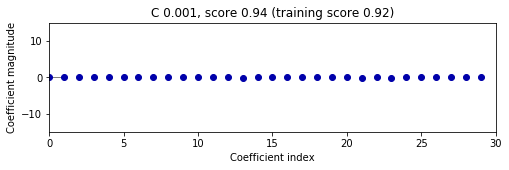

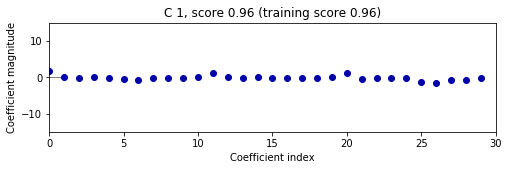

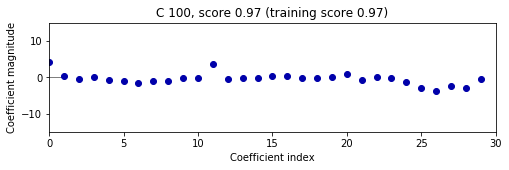

In [51]:
for C in [0.001, 1, 100]:
    plot_logreg(C, 'l2')

### Linear Support Vector Machine
Don't minimize the (misclassification) loss, but maximize the _margin_ between the classes.  
That likely generalizes better!

<img src="../images/01_svm.png" alt="ml" style="width: 600px;"/>

##### Optimization and prediction
* Find a small number of data points to define the decision boundary (support vectors)
    * Each support vector has a weight (some are more important than others)
    * Called _dual coefficients_ (dual: for every point vs for every feature)
    * Hence, this is a non-parametric model
* Prediction is identical to (weighted) kNN:
    * Points closest to a red support vector are classified red, others blue
* The objective function penalizes every point predicted to be on the `wrong` side of its hyperplane
    * This is called _hinge loss_
* This results in a convex optimization problem solved using the _Langrange Multipliers_ method
    * Can also be solved using gradient descent

#### Example: SVMs in scikit-learn

- We can use the `svm.SVC` classifier
    - or `svm.SVR` for regression
    - it only support the dual loss function
- To build a linear SVM use `kernel=linear`
- It returns the following:
    - `support_vectors_`: the support vectors
    - `dual_coef_`: the dual coefficients $a$, i.e. the `weigths` of the support vectors
    - `coef_`: only for linear SVMs, the feature weights $w$

``` python
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)
print("Support vectors:", clf.support_vectors_[:])
print("Coefficients:", clf.dual_coef_[:])
```

In [9]:
from sklearn import svm

# Linearly separable dat
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# Fit the model
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

# Get the support vectors and weights
print("Support vectors:")
print(clf.support_vectors_[:])
print("Coefficients:")
print(clf.dual_coef_[:])

Support vectors:
[[-1.021  0.241]
 [-0.467 -0.531]
 [ 0.951  0.58 ]]
Coefficients:
[[-0.048 -0.569  0.617]]


SVM result. The circled samples are support vectors, together with their coefficients.

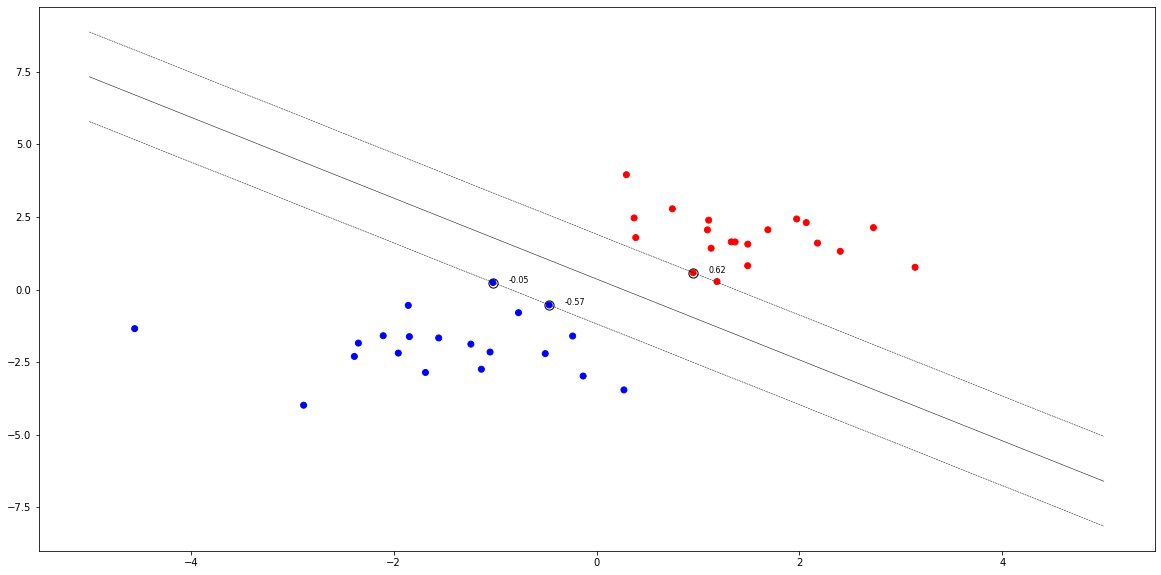

In [10]:
mglearn.plots.plot_svm_linear()

### Dealing with nonlinearly separable data
- We can allow for violations of the margin constraint by introducing a _slack variable_ $\xi^{(i)}$ for every data point. The new objective (to be minimized) becomes:

$\frac{||w||^2}{2} + C (\sum_i \xi^{(i)})$

- $C$ is a penalty for misclassification
    - Large C: large error penalties
    - Small C: less strict about violations (more regularization)

- This is known as the _soft margin_ SVM (or _large margin_ SVM)

### C and regularization

- Hence, we can use C to control the size of the margin and overfitting:
    - Small C: Violations allowed, simple model, more underfitting
    - Large C: Model is more strict, more overfitting
- The penalty term $C (\sum_i \xi^{(i)})$ acts as an L1 regularizer on the dual coefficients
    - Also known as hinge loss
    - This induces sparsity: large C values will set many dual coefficients to 0, hence fewer support vectors
    - Small C values will typically lead to more support vectors (more points fall within the margin)
    - Again, it depends on the data how flexible or strict you need to be
-  The _least squares SVM_ is a variant that does L2 regularization
    - Will have many more support vectors (with low weights)
    - In scikit-learn, this is only available for the `LinearSVC` classifier (`loss='squared_hinge'`)

Effect on linearly separable data

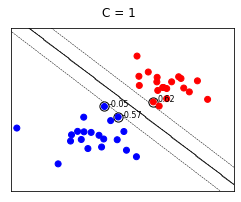

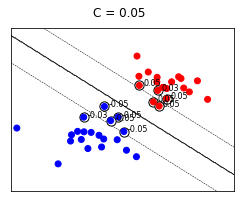

In [11]:
mglearn.plots.plot_svm_margins()

Effect on non-linearly separable data

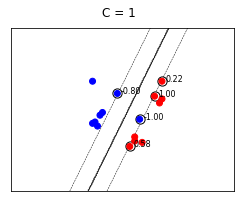

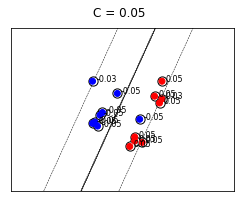

In [12]:
mglearn.plots.plot_svm_margins_nonlin()

SVM: High _C_ values (less regularization): fewer misclassifications but smaller margins, overfitting.

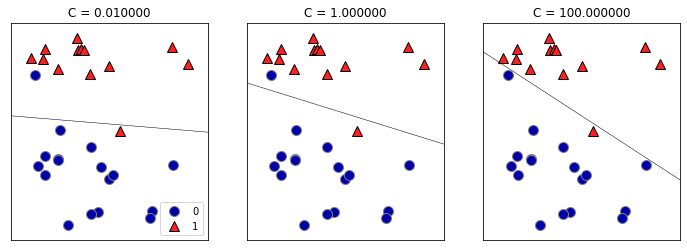

In [49]:
mglearn.plots.plot_linear_svc_regularization()

# Kernelization (Generalized linear models)

### Feature Maps
* Remember linear models?

$$\hat{y} = \mathbf{w}\mathbf{x} = \sum_{i=0}^{p} w_i \cdot x_i = w_0 \cdot x_0 + w_1 \cdot x_1 + ... + w_p \cdot x_p $$  

* When we cannot fit the data well with linear models, we can learn more complex models by simply adding more dimensions
* Feature map (or _basis expansion_) $\phi$: $ X \rightarrow \mathbb{R}^d $

$$y=\textbf{w}^T\textbf{x} \rightarrow  y=\textbf{w}^T\phi(\textbf{x})$$  

* You still may need MANY dimensions to fit the data
    * Memory and computational cost
    * More likely overfitting


Example: Ridge regression

Coefficients: [0.418]


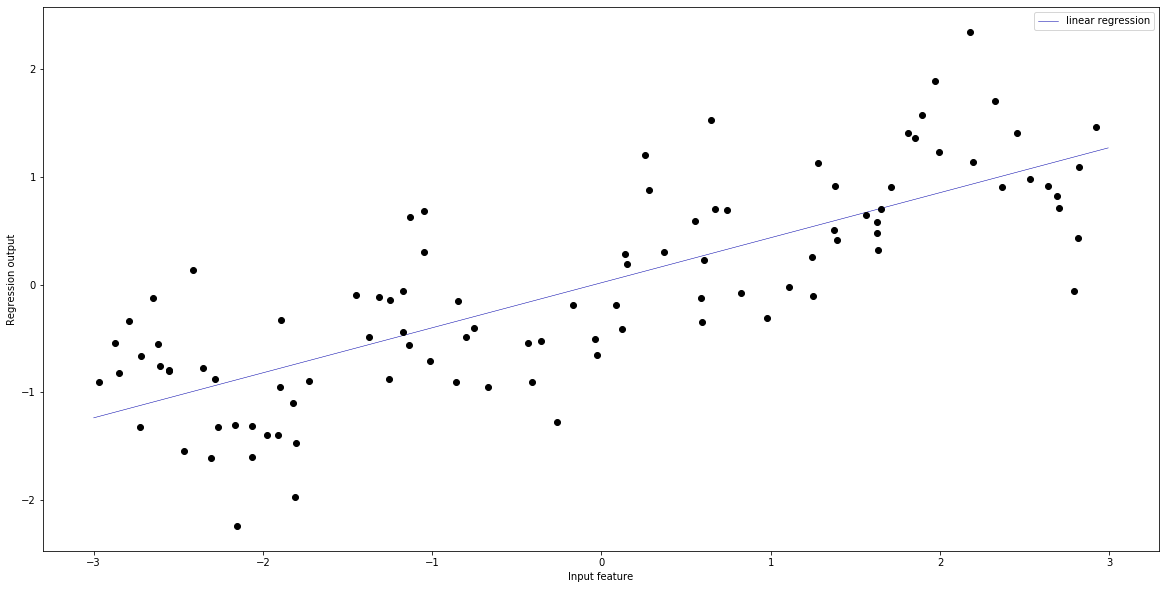

In [2]:
from sklearn.linear_model import Ridge

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = Ridge().fit(X, y)
print("Coefficients:",reg.coef_)
plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(line, reg.predict(line), label="linear regression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best");

* Add all polynomials $x^d$ up to degree D. How large should D be?
* We can also compute all polynomials and all interactions between features (e.g. $x \cdot x^2$). This leads to D^2 features.

In [3]:
from sklearn.preprocessing import PolynomialFeatures

# include polynomials up to x ** 10:
# the default "include_bias=True" adds a feature that's constantly 1
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)
styles = [dict(selector="td", props=[("font-size", "150%")]),dict(selector="th", props=[("font-size", "150%")])]
pd.DataFrame(X_poly, columns=poly.get_feature_names()).head().style.set_table_styles(styles)

Fit Ridge again:

Coefficients: [ 0.643  0.297 -0.69  -0.264  0.41   0.096 -0.076 -0.014  0.004  0.001]


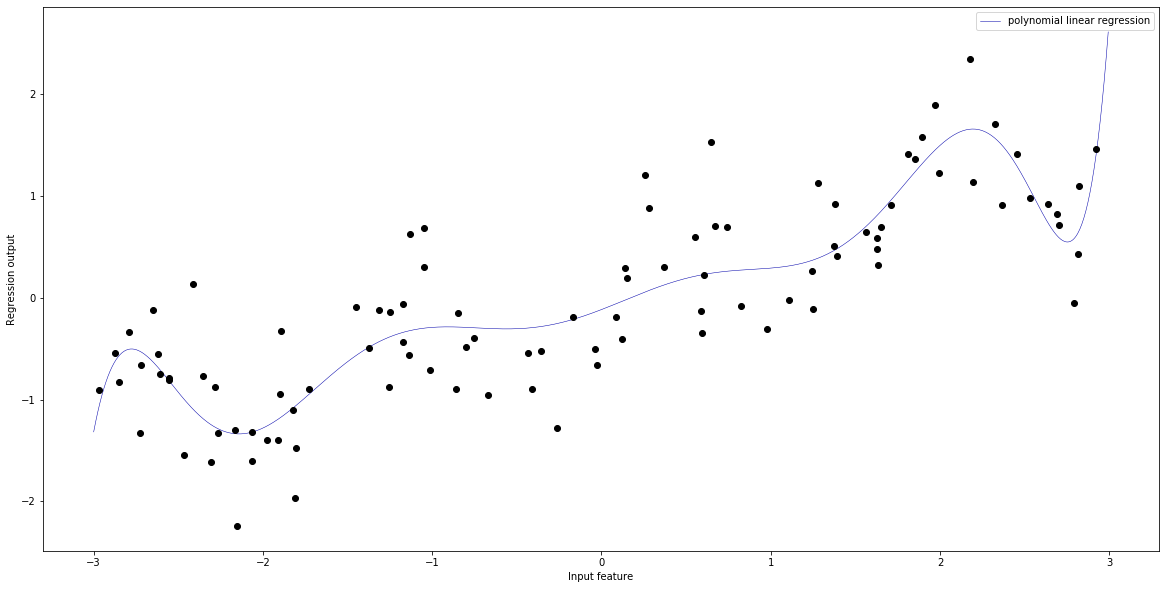

In [4]:
reg = Ridge().fit(X_poly, y)
print("Coefficients:",reg.coef_)
line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best");

### How expensive is this?

* Ridge has a closed-form solution which we can compute with linear algebra:
$$w^{*} = (X^{T}X + \lambda I)^{-1} X^T Y$$
* Since X has $n$ rows (examples), and $d$ columns (features), $X^{T}X$ has dimensionality $d x d$
* Hence Ridge is quadratic in the number of features, $\mathcal{O}(d^2n)$
* After the feature map $\Phi$, we get
$$w^{*} = (\Phi(X)^{T}\Phi(X) + \lambda I)^{-1} \Phi(X)^T Y$$
* Since $\Phi$ increases $d$ a _lot_, $\Phi(X)^{T}\Phi(X)$ becomes _huge_
* To be continued...


#### You can do the same for classification.

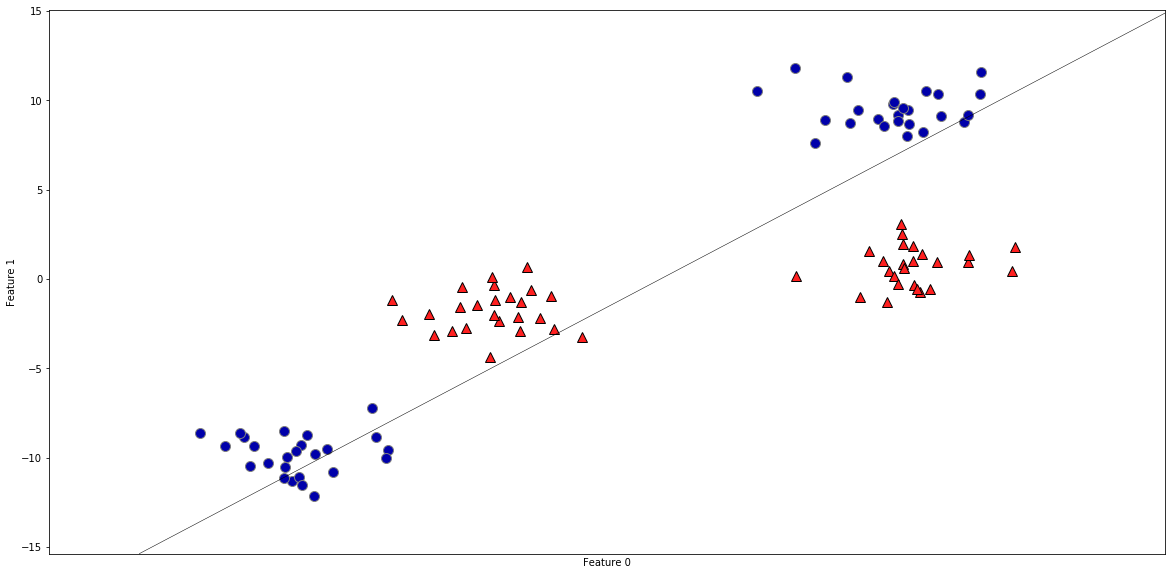

In [5]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import LinearSVC
X, y = make_blobs(centers=4, random_state=8)
y = y % 2
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

We can add a new feature by taking the squares of feature1 values

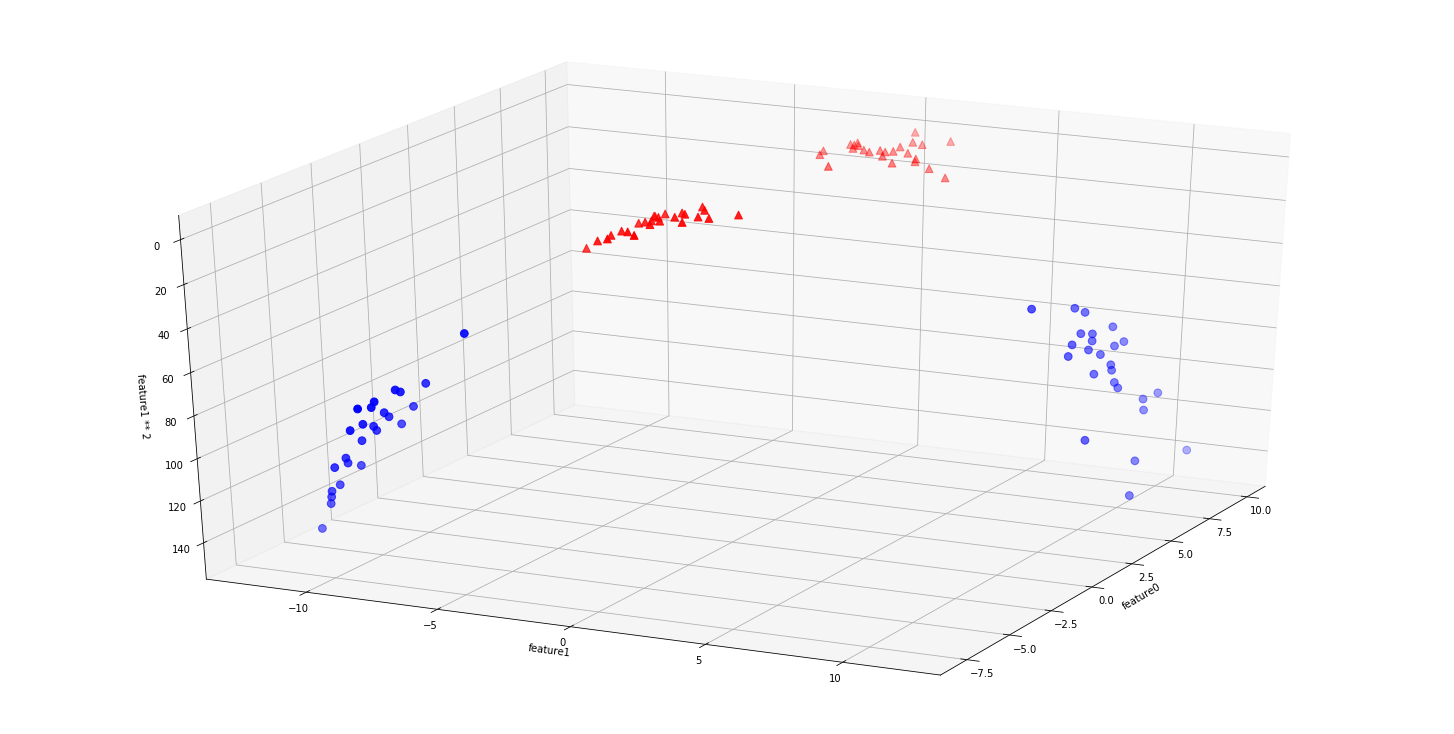

In [6]:
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])


from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y==0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2");

Now we can fit a linear model

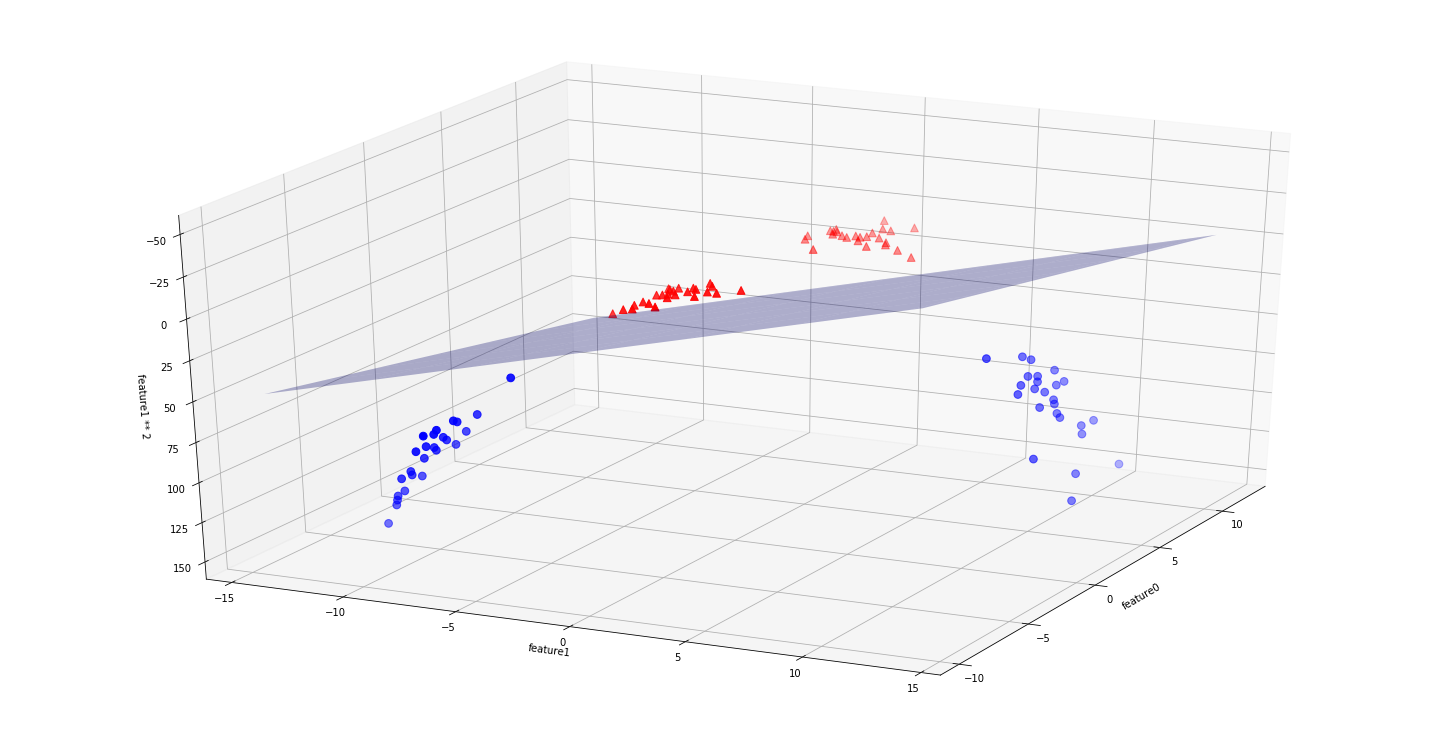

In [7]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60)

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2");

As a function of the original features, the linear SVM model is not actually linear anymore, but more of an ellipse

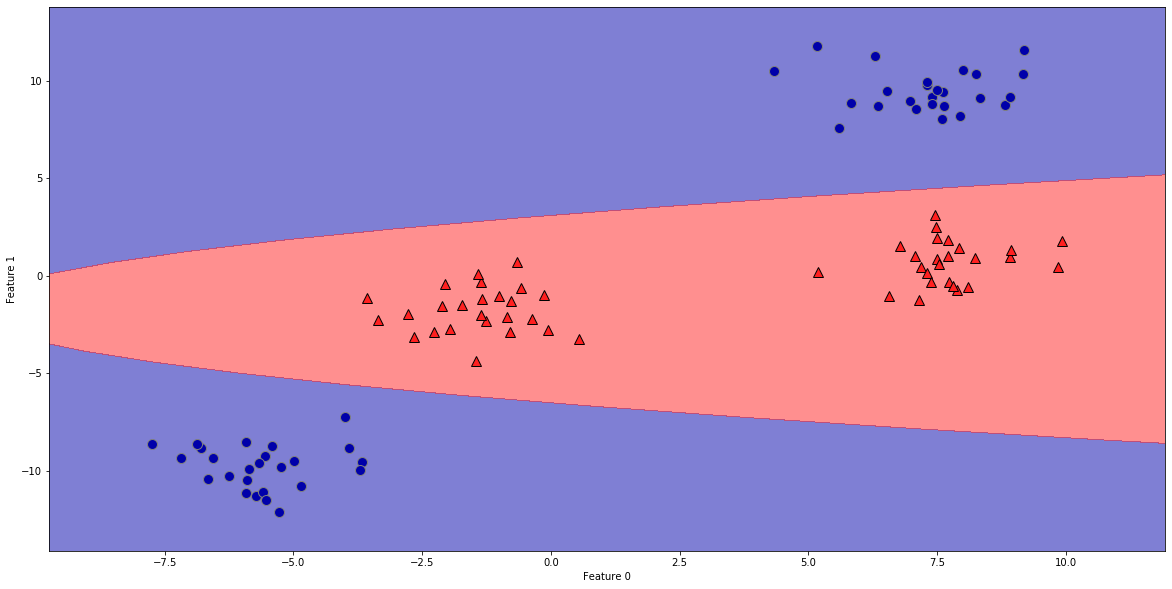

In [8]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1"); 

## Kernelization
* So, $\Phi(x)$ can be used to generate many more features based on the original feature $x$
* Useful, but expensive to evaluate.
* A _kernel function_ corresponding to a feature transformation $\Phi$ is

$$ k(x_i,x_j) = \langle \Phi(x_i) , \Phi(x_j) \rangle $$

* It measures a kind of _similarity_ between $x_i$ and $x_j$, $\langle . , . \rangle$ is the dot product
* Turns out, we can often evaluate $k(x_i,x_j)$ directly, _without_ evaluating $\Phi(x_i) , \Phi(x_j)$

## Kernel trick
* Evaluating the kernel directly can be _much_ cheaper. 
* Example: a simple _quadratic_ feature map for $x = (x_1,..., x_d )$ has dimension $\mathcal{O}(d^2)$:

$$ \Phi(x) = (x_1,..., x_d , x_1^2,..., x_d^2 , \sqrt{2} x_1 x_2 , ..., \sqrt{2} x_{d-1} x_{d}) $$

* The corresponding quadratic kernel is:

$$ k(x_i,x_j) = \langle \Phi(x_i) , \Phi(x_j) \rangle = \langle x_i , x_j \rangle + \langle x_i , x_j \rangle^2$$

* We can skip the computation of $\Phi(x_i)$ and $\Phi(x_j)$ and compute $k(x_i,x_j)$ in $\mathcal{O}(d)$ instead of $\mathcal{O}(d^2)$!

## Kernel functions
* It is useful to think of a kernel as a similarity score between 2 vectors (points)
    * Not mathematically equivalent
* There are many ways to design such a similarity score (also for text, graphs,...)
* Computationally _much_ cheaper
* We can access very large (even infinite) feature spaces $\mathcal{H}$
* Thinking in terms of similarity is much more intuitive than thinking in high-dimensional feature spaces

### Linear kernel
* Input space is same as output space: $X = \mathcal{H} = \mathbb{R}^d$
* Feature map $\Phi(x) = x$
* Kernel: $ k(x_i,x_j) = x_i \cdot x_j = x_i^T x_j $
* Geometrically, we can view these as _projections_ of $x_j$ on a hyperplane defined by $x_i$
    * Nearby points will have nearby projections
    
<img src="../images/05_dotproduct.png" alt="ml" style="width: 200px;"/>

#### Kernels: examples

- The inner product is a kernel. The standard inner product is the __linear kernel__:  
$k(x_1,x_2) = x_1^T x_2$

- Kernels can be constructed from other kernels $k_1$ and $k_2$:
    - For $\lambda \geq 0, \lambda . k_1$ is a kernel
    - $k_1 + k_2$ is a kernel
    - $k_1 . k_2$ is a kernel (thus also $k_1^n$)
- This allows to construct the __polynomial kernel__:  
$k(x_1,x_2) = (x_1^T x_2 + b)^d$, for $b \geq 0$ and $d \in \mathbb{N}$ 

- The 'radial base function' (or __Gaussian__) kernel is defined as:  
$k(x_1,x_2) = exp(-\gamma ||x_1 - x_2||^2)$, for $\gamma \geq 0$ 

![gamma](../images/05_gaussian_curves.png)

### Gaussian kernel: intuition
- Each point generates a function, the inner product is where they intersect
- The closer the points are, the more similar they are

<img src="../images/05_kernel_map.png" alt="ml" style="width: 400px;"/>

Example (for regression):
* We have 6 input points: [-6,-4,-3,0,2,4]
    * We fit a kernel over each (blue)
* We learn a coefficient for each: e.g. [-.8,.5,-0.5,.7,0.3,-0.2]
* Resulting preditions (red curve)
* Linear kernels will produce a linear function, Gaussian kernels can produce very complex functions.

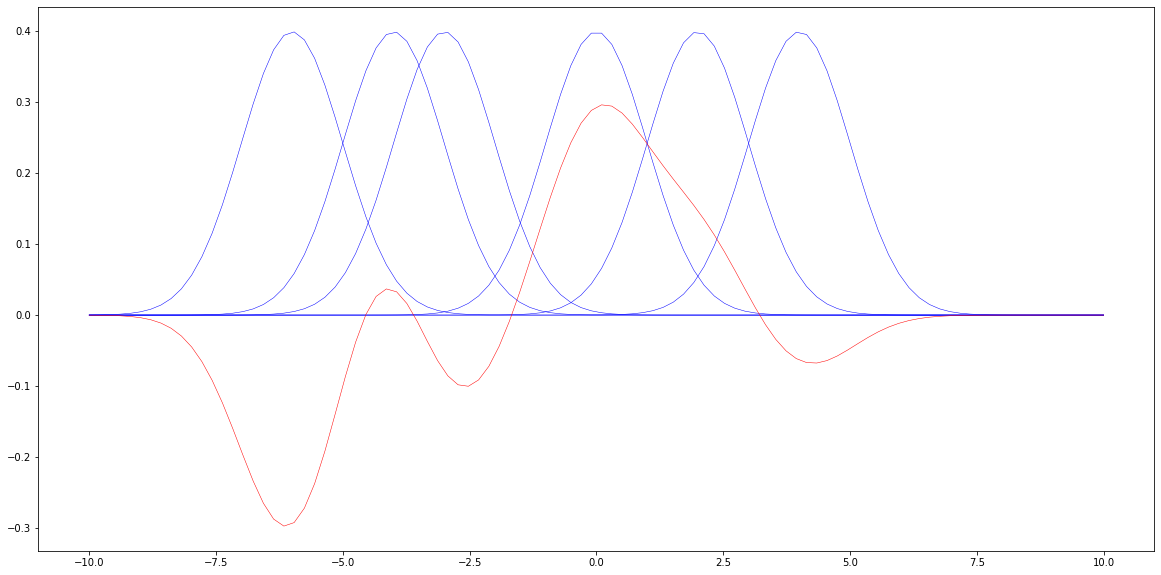

In [13]:
import scipy.stats as stats
import math

xs = [-6,-4,-3,0,2,4]
alphas = [-.8,.5,-0.5,.7,0.3,-0.2]
variance = 1
sigma = math.sqrt(variance)
p = np.linspace(-10, 10, 100)
f = [0]*100
for a,x in zip(alphas,xs):
    k = stats.norm.pdf(p, x, sigma)
    f += a*k
    plt.plot(p, k, 'b-')
plt.plot(p, f, 'r-')
plt.plot()
plt.show()

Example (for classification):
* In the RBF SVM, every support vector generates a 2D Gaussian, the final prediction is the sum of those
* At prediction time, you evaluate each Gaussian (a kind of distance between the new point and the support vector) and sum up the values

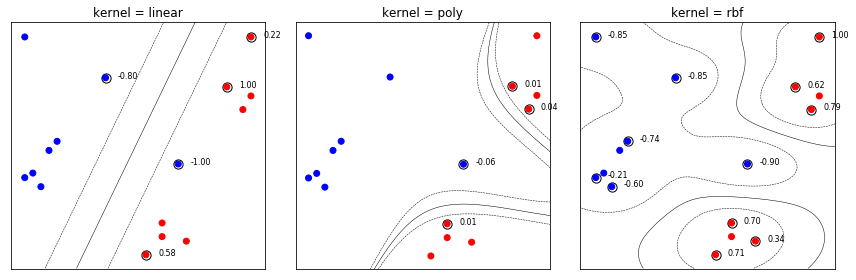

In [14]:
mglearn.plots.plot_svm_kernels()

### Local vs Global kernels
* With a linear or polynomial kernel, one support vector can affect the whole model space
    - These are called _global kernels_
* The RBF kernel only affects the region around the support vector (depending on how wide it is)
    - This a called a _local_ kernel
    - Can capture local abnormalities that a global kernel can't
    - Also overfits easily if the kernels are very narrow 

### Tuning SVM parameters
Several important parameters:

* gamma ((inverse) kernel width): high values means that points are further apart
    * High values mean narrow Gaussians, i.e. the influence of one point is very small
        * You need many support vectors
    * Leads to complex decision boundaries, overfitting
* C (our linear regularizer): 'cost' of misclassifying training examples
    * High C: force SVM to classify more examples correctly 
        * Requires more support vectors, thus complex decision boundaries
* For polynomial kernels, the _degree_ (exponent) defines the complexity of the models

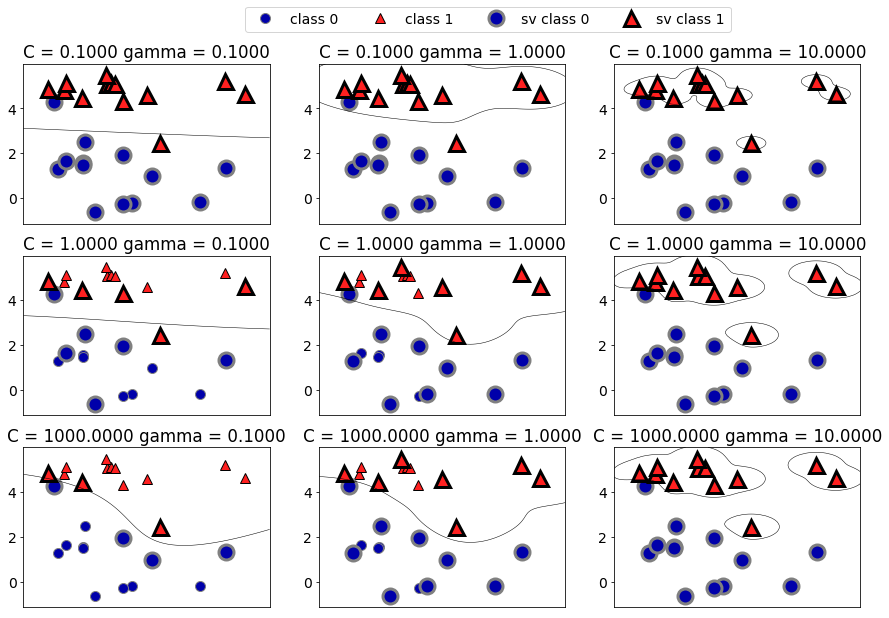

In [15]:
plt.rcParams.update({'font.size': 14})
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2));

* Low gamma (left): wide Gaussians, very smooth decision boundaries
* High gamma (right): narrow Gaussians, boundaries focus on single points (high complexity)
* Low C (top): each support vector has very limited influence: many support vectores, almost linear decision boundary
* High C (bottom): Stronger influence, decision boundary bends to every support vector

Kernel overview

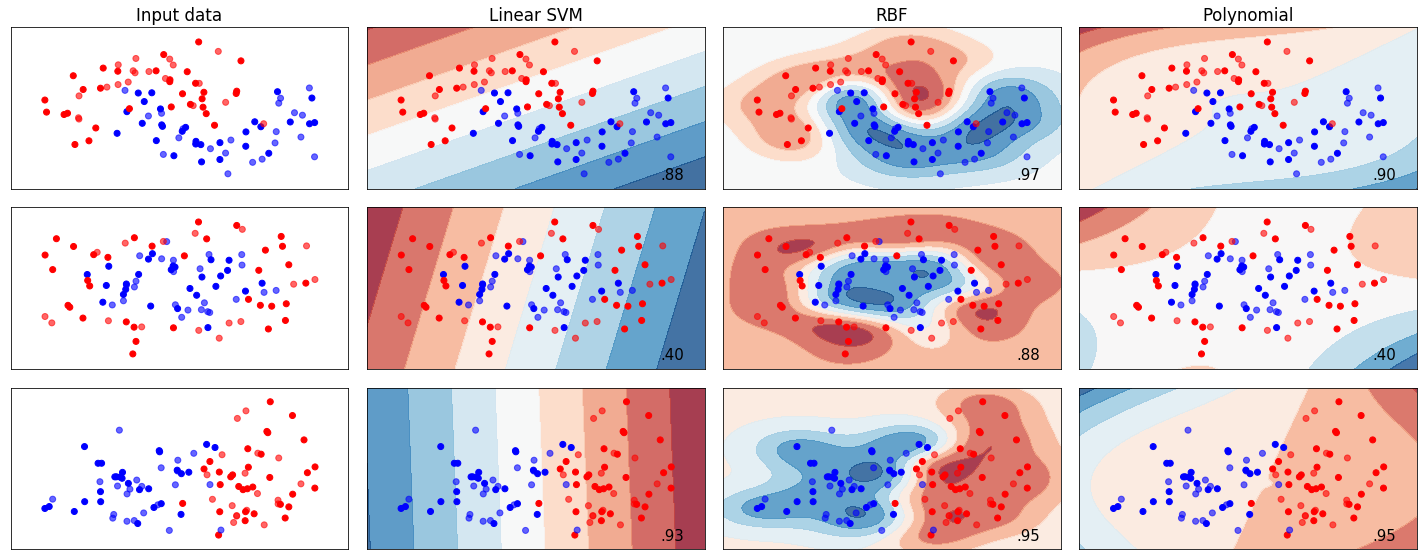

In [18]:
from mglearn import plot_classifiers
from sklearn.svm import SVC
names = ["Linear SVM", "RBF", "Polynomial"]

classifiers = [
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    SVC(kernel="poly", degree=3, C=0.1)
    ]
 
plot_classifiers.plot_classifiers(names, classifiers, figuresize=(20,8)) 

### Preprocessing Data for SVMs
* SVMs are very sensitive to hyperparameter settings
* They expect all features to be approximately on the same scale
* Data point similarity (e.g. RBF kernel) is computed the same way in all dimensions
* If some dimension is scaled differently, it will have a much larger/smaller impact
* We'll get back to this in Lecture 4 (pipelines).

### Strengths, weaknesses and parameters

* SVMs allow complex decision boundaries, even with few features. 
* Work well on both low- and high-dimensional data

* Don't scale very well to large datasets (>100000)
* Require careful preprocessing of the data and tuning of the parameters. 
* SVM models are hard to inspect

Important parameters:
* regularization parameter _C_
* choice of the kernel and kernel-specific parameters
    * Typically string correlation with _C_

## Generalized linear models
* In the same way, we can define:
    * Kernelized SVMs
    * Kernelized Ridge regression
    * 1-layer neural networks
        * The 'kernel' here is the activation function
* We can also define kernels for text, graphs, and many other types of data

# Ensemble learning
Ensembles are methods that combine multiple machine learning models (weak learners) to create more powerful models. Most popular are:

* __Bagging__: Reduce variance: Build many trees on random samples and do a vote over the predictions 
    * __RandomForests__: Build randomized trees on random bootstraps of the data
* __Boosting__: Reduce bias: Build trees iteratively, each correcting the mistakes of the previous trees
    * __Adaboost__: Ensemble of weighted trees, increasing importance of misclassified points
    * __Gradient boosting machines__: Gradually update importance of hard points until ensemble is correct
    * __XGBoost__: Faster implemenation of gradient boosting machines
* __Stacking__: Build group of base models, and train a meta-model to learn how to combine the base model predicions

### Bagging (Bootstrap Aggregating)
Reduce overfitting by averaging out individual predictions (variance reduction)

* Take a _bootstrap sample_ of your data
    * Randomly sample with replacement
    * Build a tree on each bootstrap
* Repeat `n_estimators` times 
    * Higher values: more trees, more smoothing
    * Make prediction by aggreting the individual tree predictions
* Can be done with any model (but usually trees)
    * Since Bagging only reduces variance (not bias), it makes sense to use models that are high variance, low bias
* RandomForest: Randomize trees by considering only a random subset of features of size `max_features` _in each node_
    * Higher variance, lower bias than normal trees
    * Small `max_features` yields more different trees, more smoothing
    * Default: $sqrt(n\_features)$ for classification, $log2(n\_features)$ for regression


Making predictions:
* Classification: soft voting (softmax)
    * Every member returns probability for each class
    * After averaging, the class with highest probability wins
* Regression:  
    * Return the _mean_ of all predictions
* Each base model gets the same weight in the final prediction

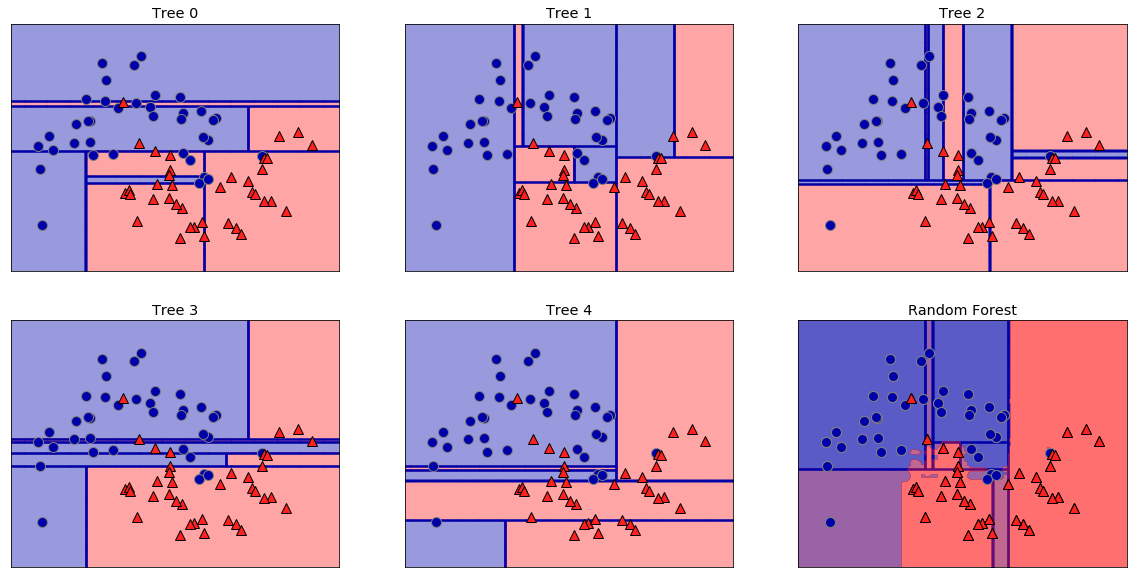

In [2]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

forest = RandomForestClassifier(n_estimators=10, random_state=2)
forest.fit(X_train, y_train) 
 
plt.rcParams.update({'font.size': 12})
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train);

## Effect on bias and variance
* 'High bias' models are simple and stable: they make the same mistakes no matter which training sample they get
* 'High variance' models are complex and unstable: they make very different predictions depending on the training sample.
* In RandomForests, increasing the number of estimators decreases variance
* Bias is mostly unaffected, but will increase if the forest becomes too large (oversmoothing)

In [3]:
from sklearn.model_selection import ShuffleSplit, train_test_split

# Bias-Variance Computation 
def compute_bias_variance(clf, X, y):
    # Bootstraps
    n_repeat = 40 # 40 is on the low side to get a good estimate. 100 is better.
    shuffle_split = ShuffleSplit(test_size=0.33, n_splits=n_repeat, random_state=0)

    # Store sample predictions
    y_all_pred = [[] for _ in range(len(y))]

    # Train classifier on each bootstrap and score predictions
    for i, (train_index, test_index) in enumerate(shuffle_split.split(X)):
        # Train and predict
        clf.fit(X[train_index], y[train_index])
        y_pred = clf.predict(X[test_index])

        # Store predictions
        for j,index in enumerate(test_index):
            y_all_pred[index].append(y_pred[j])

    # Compute bias, variance, error
    bias_sq = sum([ (1 - x.count(y[i])/len(x))**2 * len(x)/n_repeat 
                for i,x in enumerate(y_all_pred)])
    var = sum([((1 - ((x.count(0)/len(x))**2 + (x.count(1)/len(x))**2))/2) * len(x)/n_repeat
               for i,x in enumerate(y_all_pred)])
    error = sum([ (1 - x.count(y[i])/len(x)) * len(x)/n_repeat 
            for i,x in enumerate(y_all_pred)])

    return np.sqrt(bias_sq), var, error

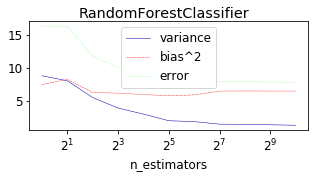

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
cancer = load_breast_cancer()

def plot_bias_variance_rf(clf, X, y):
    bias_scores = []
    var_scores = []
    err_scores = []
    n_estimators= [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

    for i in n_estimators:
        b,v,e = compute_bias_variance(clf.set_params(random_state=0,n_estimators=i),X,y)
        bias_scores.append(b)
        var_scores.append(v)
        err_scores.append(e)

    plt.figure(figsize=(5,2))
    plt.rcParams.update({'font.size': 12})
    plt.suptitle(clf.__class__.__name__)
    plt.plot(n_estimators, var_scores,label ="variance" )
    plt.plot(n_estimators, np.square(bias_scores),label ="bias^2")
    plt.plot(n_estimators, err_scores,label ="error" )
    plt.xscale('log',basex=2)
    plt.xlabel("n_estimators")
    plt.legend(loc="best")
    plt.show()

X, y = cancer.data, cancer.target
rf = RandomForestClassifier(random_state=0, n_estimators=512, n_jobs=-1)
plot_bias_variance_rf(rf, X, y)

Scikit-learn algorithms:

- `RandomForestClassifier` (or Regressor)
- `ExtraTreesClassifier`: Grows deeper trees, faster

Most important parameters:

* `n_estimators` (higher is better, but diminishing returns)
    * Will start to underfit (bias error component increases slightly)
* `max_features` (default is typically ok)
    * Set smaller to reduce space/time requirements
* parameters of trees, e.g. `max_depth` (less effect)

`n_jobs` sets the number of parallel cores to run  
`random_state` should be fixed for reproducibility

RandomForest allow another way to evaluate performance: out-of-bag (OOB) error

- While growing forest, estimate test error from training samples
- For each tree grown, 33-36% of samples are not selected in bootstrap
    - Called the 'out of bootstrap' (OOB) samples
    - Predictions are made as if they were novel test samples
    - Through book-keeping, majority vote is computed for all OOB samples from all trees
- OOB estimated test error is rather accurate in practice
    - As good as CV estimates, but can be computed on the fly (without repeated model fitting)
    - Tends to be slightly pessimistic

#### Feature importance
RandomForests provide often reliable feature importances, based on many alternative hypotheses (trees)

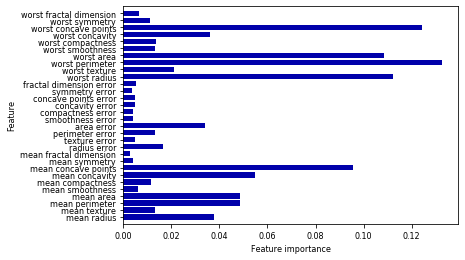

In [6]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

    
X, y = cancer.data, cancer.target
forest = RandomForestClassifier(random_state=0, n_estimators=512, n_jobs=-1)
forest.fit(X,y)
plt.rcParams.update({'font.size':8})
plot_feature_importances_cancer(forest)

#### Strengths, weaknesses and parameters
RandomForest are among most widely used algorithms:

* Don't require a lot of tuning
* Typically very accurate models
* Handles heterogeneous features well
* Implictly selects most relevant features

Downsides:

* less interpretable, slower to train (but parallellizable)
* don't work well on high dimensional sparse data (e.g. text)

## Adaptive Boosting (AdaBoost)
* Builds an ensemble of _weighted_ weak learners
    * Typically shallow trees or stumps
* Each base model tries to correct the mistakes of the previous ones
    * Sequential, not parallel
    * We give misclassified samples more weight
* Force next model to get these points right by either:
    * Passing on the weight to the loss (e.g. weighted Gini index)
    * Sample data with probability = sample weights
        * Misclassified samples are sampled multiple times so they get a higher weight
* Do weighted vote over all models

## AdaBoost algorithm
* Reset sample weights to $\frac{1}{N}$
* Build a model, using it's own algorithm (e.g. decision stumps with gini index)
* Give it a weight related to its error $E$
$$w_{i} =  \lambda\log(\frac{1-E}{E})$$
    * Good trees get more weight than bad trees 
    * Error is mapped from [0,Inf] to [-1,1], use small minimum error to avoid infinities
    * Learning rate $\lambda$ (shrinkage) decreases impact of individual classifiers
        * Small updates are often better but requires more iterations
* Update the sample weights
    * Increase weight of incorrectly predicted samples:
$s_{n,i+1} = s_{n,i}e^{w_i}$
    * Decrease weight of correctly predicted samples:
$s_{n,i+1} = s_{n,i}e^{-w_i}$
    * Normalize weights to add up to 1
* Sample new points according to $s_{n,i+1}$
* Repeat for $I$ rounds

Visualization

In [126]:
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from sklearn.preprocessing import normalize

# Code from https://xavierbourretsicotte.github.io/AdaBoost.html
def AdaBoost_scratch(X,y, M=10, learning_rate = 0.5):
    #Initialization of utility variables
    N = len(y)
    estimator_list, y_predict_list, estimator_error_list, estimator_weight_list, sample_weight_list = [],[],[],[],[]

    #Initialize the sample weights
    sample_weight = np.ones(N) / N
    sample_weight_list.append(sample_weight.copy())

    #For m = 1 to M
    for m in range(M):   

        #Fit a classifier
        estimator = DecisionTreeClassifier(max_depth = 1, max_leaf_nodes=2)
        estimator.fit(X, y, sample_weight=sample_weight)
        y_predict = estimator.predict(X)

        #Misclassifications
        incorrect = (y_predict != y)

        #Estimator error
        estimator_error = np.mean( np.average(incorrect, weights=sample_weight, axis=0))
        
        #Boost estimator weights
        estimator_weight =  learning_rate * np.log((1. - estimator_error) / estimator_error)

        #Boost sample weights
        sample_weight *= np.exp(estimator_weight * incorrect * ((sample_weight > 0) | (estimator_weight < 0)))
        sample_weight *= np.exp(-estimator_weight * np.invert(incorrect * ((sample_weight > 0) | (estimator_weight < 0))))
        sample_weight /= np.linalg.norm(sample_weight)
        
        #Save iteration values
        estimator_list.append(estimator)
        y_predict_list.append(y_predict.copy())
        estimator_error_list.append(estimator_error.copy())
        estimator_weight_list.append(estimator_weight.copy())
        sample_weight_list.append(sample_weight.copy())
        
    #Convert to np array for convenience   
    estimator_list = np.asarray(estimator_list)
    y_predict_list = np.asarray(y_predict_list)
    estimator_error_list = np.asarray(estimator_error_list)
    estimator_weight_list = np.asarray(estimator_weight_list)
    sample_weight_list = np.asarray(sample_weight_list)

    #Predictions
    preds = (np.array([np.sign((y_predict_list[:,point] * estimator_weight_list).sum()) for point in range(N)]))
    #print('Accuracy = ', (preds == y).sum() / N) 
    
    return estimator_list, estimator_weight_list, sample_weight_list, estimator_error_list

def plot_decision_boundary(classifier, X, y, N = 10, scatter_weights = np.ones(len(y)) , ax = None ):
    '''Utility function to plot decision boundary and scatter plot of data'''
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1

    # Get current axis and plot
    if ax is None:
        ax = plt.gca()
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax.scatter(X[:,0],X[:,1], c = y, cmap = cm_bright, s = scatter_weights * 40)
    ax.set_xlabel('$X_1$')
    ax.set_ylabel('$X_2$')
    
    # Plot classifier background
    if classifier is not None:
        xx, yy = np.meshgrid( np.linspace(x_min, x_max, N), np.linspace(y_min, y_max, N))
        
        #Check what methods are available
        if hasattr(classifier, "decision_function"):
            zz = np.array( [classifier.decision_function(np.array([xi,yi]).reshape(1,-1)) for  xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] )
        elif hasattr(classifier, "predict_proba"):
            zz = np.array( [classifier.predict_proba(np.array([xi,yi]).reshape(1,-1))[:,1] for  xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] )
        else:
            zz = np.array( [classifier(np.array([xi,yi]).reshape(1,-1)) for  xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] )

        # reshape result and plot
        Z = zz.reshape(xx.shape)
    
        ax.contourf(xx, yy, Z, 2, cmap='RdBu', alpha=.5, levels=[0,0.5,1])
        #ax.contour(xx, yy, Z, 2, cmap='RdBu', levels=[0,0.5,1])


from sklearn.datasets import make_circles
Xa, ya = make_circles(n_samples=400, noise=0.15, factor=0.5, random_state=1)
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

estimator_list, estimator_weight_list, sample_weight_list, estimator_error_list = AdaBoost_scratch(Xa, ya, M=60, learning_rate = 0.9)

@interact
def plot_adaboost(iteration=(0,60,1)):
    if iteration == 0:
        s_weights = (sample_weight_list[0,:] / sample_weight_list[0,:].sum() ) * 40
        plot_decision_boundary(None, Xa, ya, N = 20, scatter_weights =s_weights)
    else:
        s_weights = (sample_weight_list[iteration,:] / sample_weight_list[iteration,:].sum() ) * 40
        plot_decision_boundary(estimator_list[iteration-1], Xa, ya, N = 20, scatter_weights =s_weights ) 
        print("Base model {}, error: {:.2f}, weight: {:.2f}".format(
            iteration,estimator_error_list[iteration-1],estimator_weight_list[iteration-1]))
        

interactive(children=(IntSlider(value=30, description='iteration', max=60), Output()), _dom_classes=('widget-i…

Base model 1, error: 0.35, weight: 0.56


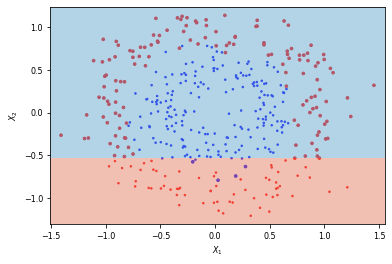

Base model 5, error: 0.21, weight: 1.19


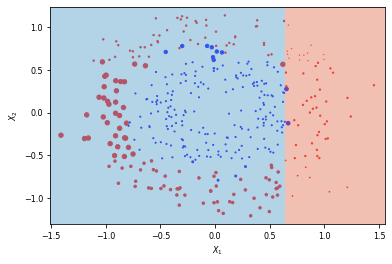

Base model 38, error: 0.35, weight: 0.56


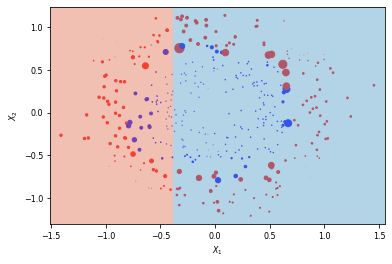

Base model 55, error: 0.31, weight: 0.70


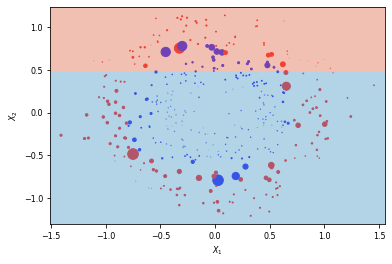

In [125]:
for iteration in [1, 5, 38, 55]:
    plot_adaboost(iteration)
    plt.show()

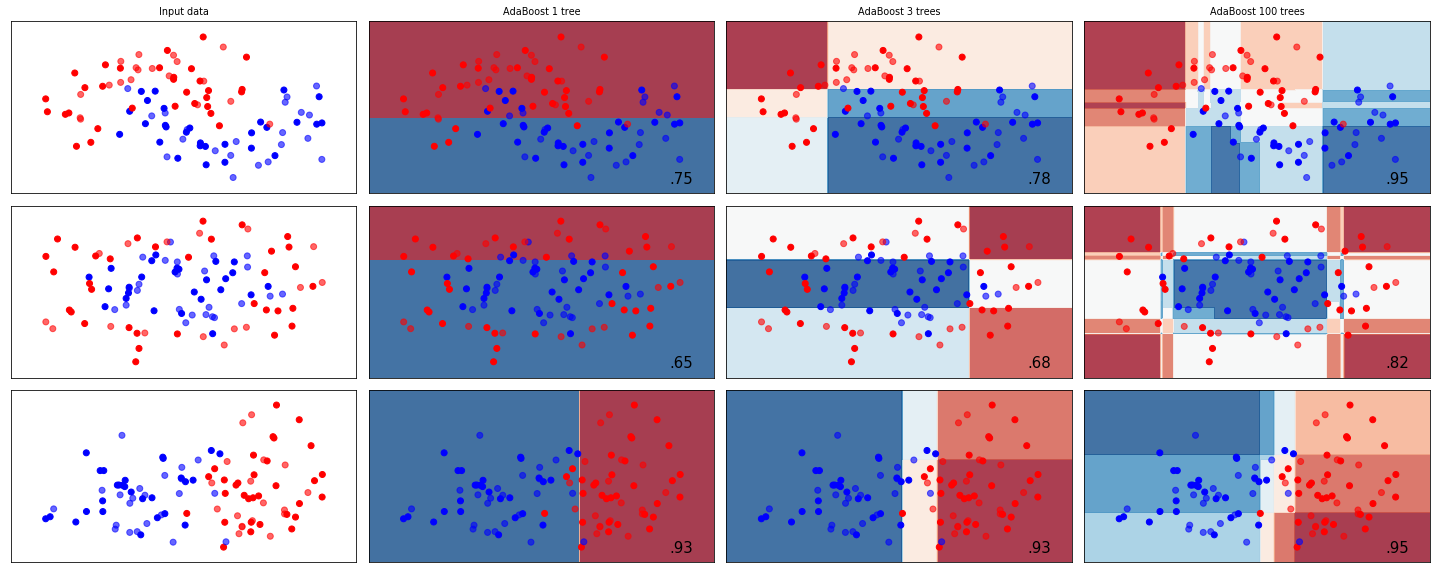

In [43]:
import mglearn.plot_classifiers as pc
from sklearn.ensemble import AdaBoostClassifier
names = ["AdaBoost 1 tree", "AdaBoost 3 trees", "AdaBoost 100 trees"]

classifiers = [
    AdaBoostClassifier(n_estimators=1, random_state=0, learning_rate=0.5),
    AdaBoostClassifier(n_estimators=3, random_state=0, learning_rate=0.5),
    AdaBoostClassifier(n_estimators=100, random_state=0, learning_rate=0.5)
    ]

pc.plot_classifiers(names, classifiers, figuresize=(20,8))  

AdaBoost reduces bias (and a little variance)
* Boosting too much will eventually increase variance

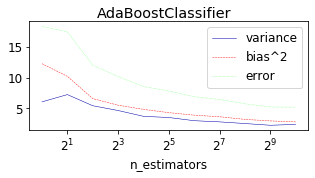

In [9]:
X, y = cancer.data, cancer.target
ab = AdaBoostClassifier(random_state=0, n_estimators=1024)
plot_bias_variance_rf(ab, X, y)

## AdaBoost Recap
* Representation: weighted ensemble of base models
    * Base models can be built by any algorithm
    * Classification: weighted vote over all base models
    * Regression: $$y = \sum_{i=1}^{N} w_i tree_i(X)$$
* Loss function: weighted loss function of base models
* Optimization: Greedy search


## Gradient Boosted Regression Trees (Gradient Boosting Machines)
Several differences to AdaBoost:
* Start with initial guess (e.g. 1 leaf, average value of all samples)
* Base-models are shallow trees (depth 2-4, not stumps)
* Models are weighted (scaled) by same amount (learning rate)
* Subsequent models aim to predict the error of the previous model
    * _Additive model_: final prediction is the sum of all base-model predictions
* Iterate until $I$ trees are built (or error converges)



## GradientBoosting Intuition (Regression)
* Do initial prediction $M_0$ (e.g. average target value)
* Compute the _pseudo-residual_ (error) _for every sample_ $n$: $r_{n} = y_n - y^{(M_{i})}_n$
    * Where $y^{(M_{i})}_n$ is the prediction for $y_n$ by model $M_{i}$


* Build new model $M_1$ to predict the pseudo-residual of $M_0$
* New prediction at step $I$:
$$y_{n} = y^{(M_{i-1})}_n + \lambda * y^{(M_{i})}_n = y^{(M_{0})}_n + \sum_{i=1}^I \lambda * y^{(M_{i})}_n$$
    * $\lambda$ is the learning rate (or _shrinkage_)
    * Taking small steps in right direction reduces variance (but requires more iterations)
* Compute new pseudo-residuals, and repeat
    * Each step, the pseudo-residuals get smaller
* Stop after given number of iterations, or when the residuals don't decrease anymore (early stopping)

``` python
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
```

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


``` python
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
```

In [11]:
# We are overfitting. We can decrease max_depth
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


``` python
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
```

In [12]:
# or decrease the learning rate (less effect) 
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train) 

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


Gradient boosting machines use much simpler trees
- Hence, tends to completely ignore some of the features

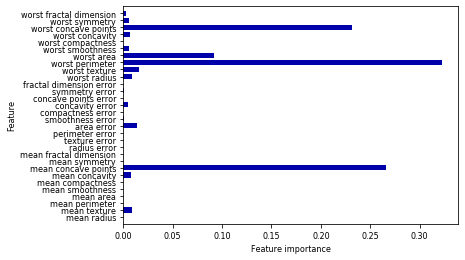

In [13]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plt.rcParams.update({'font.size':8})
plot_feature_importances_cancer(gbrt)

##### Strengths, weaknesses and parameters
* Among the most powerful and widely used models
* Work well on heterogeneous features and different scales
* Require careful tuning, take longer to train.
* Does not work well on high-dimensional sparse data

Main hyperparameters:

* `n_estimators`: Higher is better, but will start to overfit
* `learning_rate`: Lower rates mean more trees are needed to get more complex models
    * Set `n_estimators` as high as possible, then tune `learning_rate`
* `max_depth`: typically kept low (<5), reduce when overfitting
* `n_iter_no_change`: early stopping: algorithm stops if improvement is less than a certain tolerance `tol` for more than `n_iter_no_change` iterations.

### XGBoost

XGBoost is another python library for gradient boosting  
Install separately, `conda install -c conda-forge xgboost`

- The main difference lies the use of approximation techniques to make it faster.
    - About 5x faster _per core_. Thus more boosting iterations in same amount of time
- Sketching: Given 10000 possible splits, it will only consider 300 "good enough" splits by default
    - Controlled by the `sketch_eps` parameter (default 0.03)
- Loss function approximation with Taylor Expansion: more efficient way to evaluate splits
- Allows plotting of the learning curve
- Allows to stop and continue later (warm-start)

Further reading:
[XGBoost Documentation](https://xgboost.readthedocs.io/en/latest/parameter.html#parameters-for-tree-booster)
[Paper](http://arxiv.org/abs/1603.02754)  

### LightGBM
Another fast boosting technique

* Uses _gradient-based sampling_:
    - use all instances with large gradients (e.g. 10% largest) 
    - randomly sample instances with small gradients, ignore the rest
    - intuition: samples with small gradients are already well-trained.
    - requires adapted information gain criterion
* Does smarter encoding of categorical features

Comparison

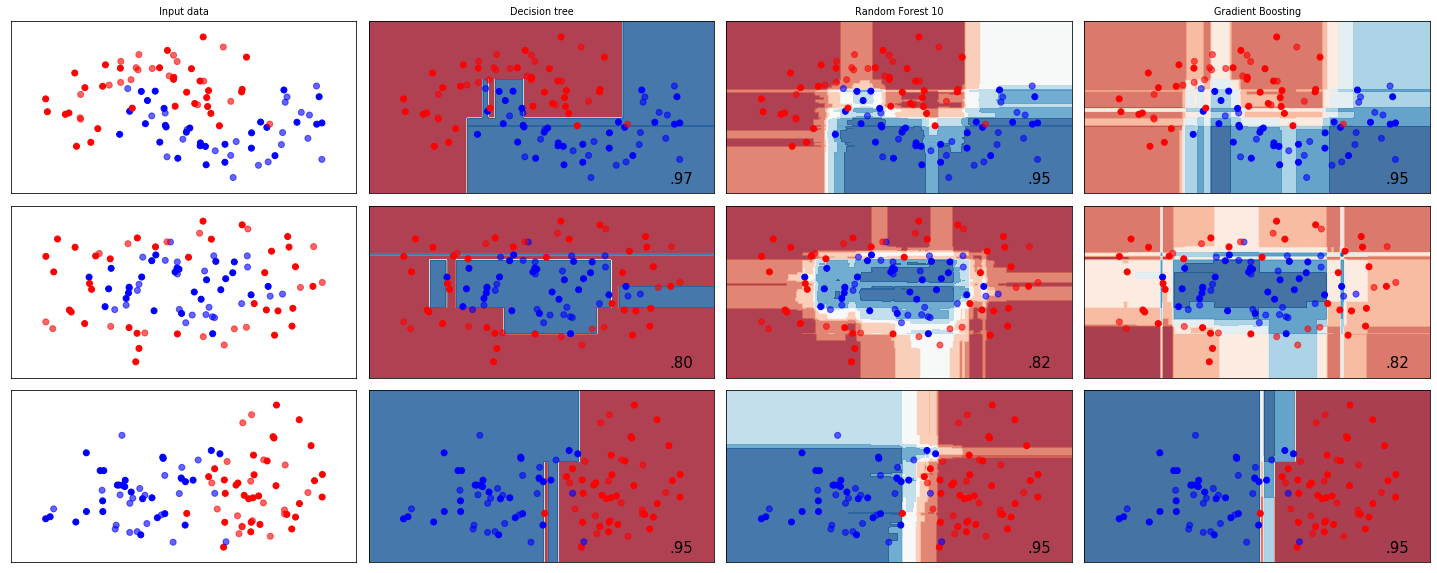

In [14]:
import mglearn.plot_classifiers as pc
names = ["Decision tree", "Random Forest 10", "Gradient Boosting"]

classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1),
    GradientBoostingClassifier(random_state=0, learning_rate=0.5)
    ]

pc.plot_classifiers(names, classifiers, figuresize=(20,8))

### Algorithm overview

| Name | Representation | Loss function | Optimization | Regularization |
|---|---|---|---|---|
| Classification trees | Decision tree | Information Gain (KL div.) / Gini index | Hunt's algorithm | Tree depth,... |
| Regression trees | Decision tree | Min. quadratic distance | Hunt's algorithm | Tree depth,... |
| Bagging | Ensemble of any model | / | / | Number of models,... |
| RandomForest | Ensemble of random trees | / | / | Number of trees,... |
| AdaBoost | Ensemble of models (trees) | Weighted loss of base models | Greedy search | Number of trees,... |
| GradientBoosting | Ensemble of models (trees) | Ensemble loss | Gradient descent | Number of trees,... |

### Summary
- Bagging / RandomForest is a variance-reduction technique
    - Build many high-variance (overfitting) models
        - Typically deep (randomized) decision trees
        - The more different the models, the better
    - Aggregation (soft voting or averaging) reduces variance
    - Parallellizes easily
- Boosting is a bias-reduction technique
    - Build many high-bias (underfitting) models
        - Typically shallow decision trees
        - Sample weights are updated to create different trees
    - Aggregation (soft voting or averaging) reduces bias
    - Doesn't parallelize easily. Slower to train, much faster to predict.
    - Smaller models, typically more accurate than RandomForests.
- You can build ensembles with other models as well
    - Especially if they show high variance or bias
- It is also possible to build _heterogeneous_ ensembles
    - Models from different algorithms
    - Often a meta-classifier is trained on the predictions: Stacking